In [1]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy

In [3]:
## Baseline simulator parameters
n_genes = 128
n_vaccines = 3 # DO NOT CHANGE, breaks the simulator.
n_treatments = 4
n_population = 1000
n_symptoms = 10
#batch_size = 2000

#assert n_population/batch_size == n_population//batch_size, 'the batch size must evenly divide the number of people'

In [4]:
population = Population(n_genes, n_vaccines, n_treatments)

In [5]:
X = population.generate(n_population)
n_features = X.shape[1]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(array([ 11.,  59.,  87.,  99., 108., 110., 104.,  74.,  68.,  72.,  47.,
         32.,  27.,  22.,  10.,  16.,  12.,   7.,  13.,   7.,   7.,   1.,
          2.,   1.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([  1.38321646,   5.72526335,  10.06731023,  14.40935712,
         18.75140401,  23.0934509 ,  27.43549779,  31.77754468,
         36.11959157,  40.46163846,  44.80368535,  49.14573224,
         53.48777913,  57.82982602,  62.1718729 ,  66.51391979,
         70.85596668,  75.19801357,  79.54006046,  83.88210735,
         88.22415424,  92.56620113,  96.90824802, 101.25029491,
        105.5923418 , 109.93438868, 114.27643557, 118.61848246,
        122.96052935, 127.30257624, 131.64462313]),
 <a list of 30 Patch objects>)

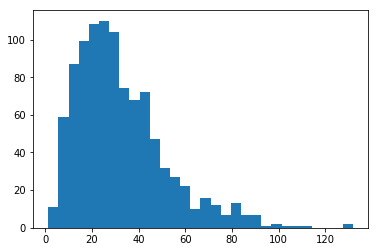

In [8]:
plt.hist(X[:,10], bins=30)

In [9]:
# scoring function for the query 'most common education'
def u(x, value):
    v_cnts = x.value_counts()
    return v_cnts[value] / v_cnts.sum()

In [10]:
def exponential(x, R, u, sensitivity, epsilon, n=1):
    scores = u(x, R) # score each element in R
    probs = np.exp(epsilon*scores / 2 / sensitivity)
    probs /= probs.sum()
    return np.random.choice(R, n, p=probs)

In [11]:
exponential(X[:,10].astype(int), np.unique(X[:,10].astype(int)), u, 1, 4, n=n_population)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [20]:
np.unique(X[:,10].astype(int))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 122, 123, 129, 134, 139, 140, 144, 145, 152])